# Introduction to the Moving Least-Squares Approach

Assume the following problem description:
You got a dataset of unstructured points - let's say a bunch of positions $\mathbf{x}_i$ and a also respective height $f_i$ for every position. 
The goal is, to get a function $f(\mathbf{x})$, that approximates the height at any position $\mathbf{x}$ we don't know in a so called "Least-Squares Sense".
This means, that this function $f(\mathbf{x})$ should give a good approximation for this unknown point and also produces more or less equal errors for the heights $f(\mathbf{x}_i)$ of all known points $\mathbf{x}_i$, if we throw them into it.

Therefore we define the minimization goal
$$
\text{min}_{f \in \Pi_m^d} \sum_i || f(\mathbf{x_i}) - f_i||^2
$$
$f$ is thereby taken from a set of $m$ polynomial basis functions, which are aligne in a so called polynomial basis vector $\mathbf{b}(\mathbf{x})$. $d$ refers to the spatial dimension, which in our case will be $d=2$.
The minimization goal can also be written in a much easier way
$$
f(\mathbf{x}) = \mathbf{b}(\mathbf{x})^{T} \mathbf{c} = \sum_{j=1}^k b_j(\mathbf{x}) c_j
$$
whereby $\mathbf{c}$ is just another vector, in which we store some specific coefficients, that give us the best fit for $f(\mathbf{x})$ and our dataset.

An example for polynomial basis vectors could be:

$$ \mathbf{b}(\mathbf{x}) = \begin{pmatrix} 1 & x & y & x^2 & xy & y^2 \end{pmatrix} $$

The number of elements in $\mathbf{b}$ can be calculated through this neat formula:

$$k = \frac{(d+m)!}{d! m!}$$

This is the general approach for any least-squres method. But what can we do if out dataset is so large, that it will take us hours to fit the function $f(\mathbf{x})$ to every point of it?
Thats where we make use of the moving least-squares method. 
This time, we only take a sub-set of our data - let's call it the neighborhood $\Omega_i$ of a specific position $\mathbf{x}_{\Omega}$.



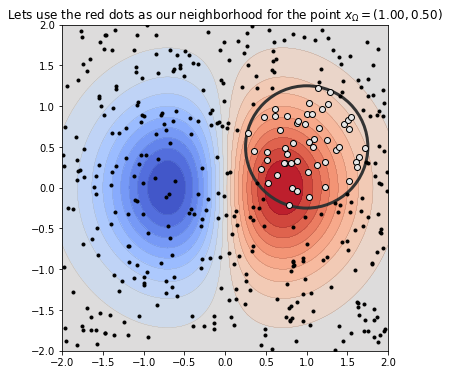

In [29]:
%matplotlib inline
import numpy as np
from numpy import sqrt, abs
from matplotlib import pyplot as plt


def dist(xa, xb):
    '''This function returns the euclidean distance between two
    points <xa = (x_a, y_y)> and <xb = (x_b, y_b)>'''
    return sqrt(sum((xa-xb)**2))

def get_neighborhood(xi, xx, h):
    '''This function returns the indices of points
    from the global point array <xx = (x, y)> , that are located 
    around a point coordinate <xi = (x_i, y_i)> within a distance 
    <h>'''
    hood = ()
    for i in range(len(xx)):
        if (dist(xi, xx[i]) <= h): hood += (i,)
    return np.array(hood)
    
def eval_fun(x, y):
    return x * np.exp(-x**2 - y**2)

#--------------------------------------------------------------------------
# Create a set of randomly distributed nodes in 2D and pass the height
# as an exponential function
#--------------------------------------------------------------------------
np.random.seed(19680801)
npts = 400
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
f = eval_fun(x, y)

#--------------------------------------------------------------------------
# Create a structured dataset for the "real" solution
#--------------------------------------------------------------------------
Nsol = 400
X, Y = np.meshgrid(np.linspace(-2, 2, Nsol), np.linspace(-2, 2, Nsol))
Z = eval_fun(X, Y)

#--------------------------------------------------------------------------
# Define the neighborhood
#--------------------------------------------------------------------------
xx = np.array(list(zip(x,y)))
x_omega = (1.0, 0.5)
h = 0.75
hood_ind = get_neighborhood(x_omega, xx, h)
hood_xx = np.array(list(zip(x[hood_ind],y[hood_ind])))
hood_f  = f[hood_ind]


#-------------------------------------------------------------------------
#  Plot the data
#--------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(6,6)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Plot the "real" solution
ax.contourf(X,Y,Z, levels=np.linspace(np.min(Z), np.max(Z), 20), cmap=plt.cm.coolwarm)
ax.contour(X,Y,Z, levels=np.linspace(np.min(Z), np.max(Z), 20), colors='k', linewidths=0.1)

# Plot the unstructured data points
ax.plot(x, y, 'ko', ms=3)

# Plot the neighborhood
ax.plot(x[hood_ind], y[hood_ind], marker='o', ms=6, ls='None', c=[.9,.9,.9], mec='k')
circ = plt.Circle(x_omega, h, color=[.2,.2,.2], fill=False, lw=3)
ax.add_artist(circ)
ax.set_title(r'Lets use the red dots as our neighborhood for the point $x_{\Omega} = (%.2f, %.2f)$' % (x_omega[0],x_omega[1]))



plt.show()

# The Math behind it

In order to give points that are closer to our point of interest $\mathbf{x}_{\Omega}$ more importance, we multiply a Kernel Function $W(\mathbf{x_{\Omega}, \mathbf{x}_i})$ with the minimization problem, what we will now call the error functional $J_{MLS}$

$$\text{min}_{f \in \Pi_m^d}\underbrace{ \sum_{i \in \Omega} W(\mathbf{x}_{\Omega}, \mathbf{x}_i) \, || f(\mathbf{x_i}) - f_i||^2}_{J_{MLS}}$$


This can be minimized by inserting $ f(\mathbf{x}_i) = \mathbf{b}(\mathbf{x}_i)^T \mathbf{c}$ and setting the partial derivatives of the error functional to zero, i.e. $\nabla J_{MLS} = 0$.
Through this approach, we get a set of linear equations in the following form:

$$
\begin{aligned}
\frac{\partial J_{MLS}}{\partial c_1} = 0 & \rightarrow & \sum_{i \in \Omega} 2 W(\mathbf{x}_{\Omega}, \mathbf{x}_i)  \, b_1(\mathbf{x_i}) \, \left[\mathbf{b}(\mathbf{x_i})^T \mathbf{c} - f_i \right] = 0 \\
\frac{\partial J_{MLS}}{\partial c_2} = 0 & \rightarrow & \sum_{i \in \Omega} 2 W(\mathbf{x}_{\Omega}, \mathbf{x}_i)  \, b_2(\mathbf{x_i}) \, \left[\mathbf{b}(\mathbf{x_i})^T \mathbf{c} - f_i \right] = 0 \\
\vdots & \quad & \\
\frac{\partial J_{MLS}}{\partial c_k} = 0 & \rightarrow & \sum_{i \in \Omega} 2 W(\mathbf{x}_{\Omega}, \mathbf{x}_i)  \, b_k(\mathbf{x_i}) \, \left[\mathbf{b}(\mathbf{x_i})^T \mathbf{c} - f_i \right] = 0
\end{aligned}
$$

This can be written in matrix notation as

$$
\begin{aligned}
\sum_{i \in \Omega} 2 W(\mathbf{x}_{\Omega}, \mathbf{x}_i) \, \mathbf{b}(\mathbf{x_i}) \, \left[\mathbf{b}(\mathbf{x_i})^T \mathbf{c} - f_i \right]  & = \\
2 \left[  \underbrace{\sum_{i \in \Omega}  W(\mathbf{x}_{\Omega}, \mathbf{x}_i) \mathbf{b}(\mathbf{x_i}) \mathbf{b}(\mathbf{x_i})^T}_{:=\mathbf{M}(\mathbf{x}_\Omega)} \mathbf{c} - \sum_{i \in \Omega} W(\mathbf{x}_{\Omega}, \mathbf{x}_i) \mathbf{b}(\mathbf{x_i}) f_i\right] & = \mathbf{0}.
\end{aligned}
$$

Or in short form 

$$ 
\mathbf{M}(\mathbf{x}_\Omega) \, \mathbf{c} = \sum_{i \in \Omega} W(\mathbf{x}_{\Omega}, \mathbf{x}_i) \, \mathbf{b}(\mathbf{x_i}) \,f_i 
$$

The $(k\times k)$ matrix $\mathbf{M}(\mathbf{x}_\Omega)$ has the following form:

$$
\mathbf{M}(\mathbf{x}_\Omega)
= \sum_{i \in \Omega} W(\mathbf{x}_{\Omega}, \mathbf{x}_i) \mathbf{b}(\mathbf{x}_i) \mathbf{b}(\mathbf{x}_i)^{T}
= \sum_{i \in \Omega} W(\mathbf{x}_{\Omega}, \mathbf{x}_i)
\left\lgroup \matrix{b_1(\mathbf{x_i}) b_1(\mathbf{x_i})  & \cdots & b_1(\mathbf{x_i}) b_k(\mathbf{x_i}) \cr
                     \vdots & \ddots & \vdots \cr
                     b_k(\mathbf{x_i}) b_1(\mathbf{x_i})  & \cdots & b_k(\mathbf{x_i}) b_k(\mathbf{x_i}) }
                     \right\rgroup
$$

We define the following $(k \times N)$ matrix $\mathbf{P}(\mathbf{x}_\Omega)$:

$$
\mathbf{P}(\mathbf{x}_\Omega) = 
\left\lgroup
\matrix{ 
W(\mathbf{x}_{\Omega}, \mathbf{x}_1) b_1(\mathbf{x}_1) & \cdots & W(\mathbf{x}_{\Omega}, \mathbf{x}_N) b_1(\mathbf{x}_N)
\cr\vdots & \ddots & \vdots \cr
W(\mathbf{x}_{\Omega}, \mathbf{x}_1) b_k(\mathbf{x}_1) & \cdots & W(\mathbf{x}_{\Omega}, \mathbf{x}_N) b_k(\mathbf{x}_N)
}
\right\rgroup
$$

Hereby $N$ denotes now the number of points in our neighborhood $\Omega$.
If we store all values of these points in a vector 

$$\mathbf{f} = {\left\lgroup\matrix{f_1 \cr f_2 \cr \vdots \cr f_N}\right\rgroup},$$

we can compute the right hand side of our linear equation system through

$$
\sum_{i \in \Omega} W(\mathbf{x}_{\Omega}, \mathbf{x}_i) \, \mathbf{b}(\mathbf{x_i}) \,f_i = \mathbf{P}(\mathbf{x}_\Omega) \, \mathbf{f}.
$$

So we end up with the following linear equation system in matrix notation, which we need to solve for the vector of unknowns $\mathbf{c}$.

$$
\mathbf{M}(\mathbf{x}_\Omega) \, \mathbf{c} = \mathbf{P}(\mathbf{x}_\Omega) \, \mathbf{f}
$$

Herfore we need to invert the matrix $\mathbf{M}(\mathbf{x}_\Omega)$:

$$\mathbf{c} = \mathbf{M}(\mathbf{x}_\Omega)^{-1} \, \mathbf{P}(\mathbf{x}_\Omega) \, \mathbf{f}$$

Thats it! If we want to compute the value of any point $\mathbf{x}$ within our neighborhood $\Omega$, we just need to plug in formulation for the coefficient-vector $\mathbf{c}$ into our approximation function equation:

$$ 
f(\mathbf{x}) = \underbrace{\mathbf{b}(\mathbf{x})^T \mathbf{M}(\mathbf{x}_\Omega)^{-1} \, \mathbf{P}(\mathbf{x}_\Omega)}_{:= \mathbf{u}(\mathbf{x}, \mathbf{x}_\Omega)} \, \mathbf{f},
$$

where we introduce another vector $\mathbf{u}(\mathbf{x}, \mathbf{x}_\Omega)$, called the MLS shape function.

Before writing some code to compute all these vectors and matrices, let's talk about the Kernel function $W(\mathbf{x})$.



# The Kernel Function
Many different Kernel functions $W(\mathbf{x}_{\Omega}, \mathbf{x}_{i})$ can be defined for the MLS approach. They all got in common, that they use the euclidean distance between the centroid of our neighborhood $\mathbf{x}_{\Omega}$ and the centroids of the points in our neighborhood $\mathbf{x}_i$

$$ d(\mathbf{x}_{\Omega}, \mathbf{x}_i) = \sqrt{(x_{\Omega}-x_i)^2 + (y_{\Omega}-y_i)^2}. $$


A common Kernel is the Gaussian Weighting Function (GWF)

$$
W(\mathbf{x}_{\Omega}, \mathbf{x}_i)_{GWF} =  \exp{\left[-\frac{d(\mathbf{x}_{\Omega}, \mathbf{x}_i)^2}{h^2}\right]}
$$
which uses the shape parameter $h$ to smooth out small features in the data.

The Inverse Distance Weighting Function (IWF) is defined through

$$
W(\mathbf{x}_{\Omega}, \mathbf{x}_i)_{IWF} = \frac{1}{d^2 + \varepsilon^2}
$$

with a parameter $\varepsilon$.

# Numerics
In order to avoid numerical instabilities due to bad conditioned matrices, it can be helpful to perform a coordinate transformation for the polynomial basis vector from $\mathbf{b}(\mathbf{x})$ to $\mathbf{b}(\mathbf{x} - \mathbf{x}_{\Omega})$.



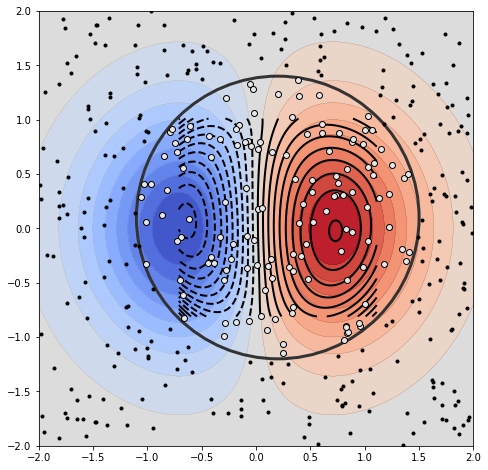

In [32]:
from numpy import exp, linalg
from math import factorial

def eval_gwf_kernel(xi, x_omega, h):
    '''This function evaluates the Gaussian Weighting Function 
    between its centerpoint <x_omega = (x_omega, y_omega)> and 
    an arbitrary point <xi = (xi, yi)>'''
    return exp(-dist(x_omega, xi)**2 / h**2)

def eval_iwf_kernel(xi, x_omega, h):
    '''This function evaluates the Inverse Distance Weighting
    Function between its centerpoint <x_omega = (x_omega, y_omega)> and 
    an arbitrary point <xi = (xi, yi)>'''
    epsilon = 1e-1
    return 1. / (dist(x_omega, xi)**2 + epsilon**2)

def eval_wnf_kernel(xi, x_omega, h):
    '''This function evaluates the Wendland Weighting
    Function between its centerpoint <x_omega = (x_omega, y_omega)> and 
    an arbitrary point <xi = (xi, yi)>'''
    d = dist(x_omega, xi)
    return (1. - d/h)**4 * (4. * d/h + 1)

def eval_basis_vector(xi, x_omega, i):
    '''This function returns the <i>th entry of the polynomial
    basis vector p(x) for a given point <xi = (xi, yi)> and the 
    centre of the neighborhood <x_omega = (x_omega, y_omega)>
    
    p = (1, 
         x, y, 
         xx, xy, yy, 
         xxx, xxy, xyy, yyy, 
         xxxx, xxxy, xxyy, xyyy, yyyy)
    '''
    if i==0: return 1.
    
    if i==1: return (xi[0]-x_omega[0])
    if i==2: return (xi[1]-x_omega[1])
    
    if i==3: return (xi[0]-x_omega[0])**2
    if i==4: return (xi[0]-x_omega[0]) * (xi[1]-x_omega[1])
    if i==5: return (xi[1]-x_omega[1])**2
    
    if i==6: return (xi[0]-x_omega[0])**3
    if i==7: return (xi[0]-x_omega[0])**2 * (xi[1]-x_omega[1])
    if i==8: return (xi[0]-x_omega[0]) * (xi[1]-x_omega[1])**2
    if i==9: return (xi[1]-x_omega[1])**9
    
    if i==10: return (xi[0]-x_omega[0])**4
    if i==11: return (xi[0]-x_omega[0])**3 * (xi[1]-x_omega[1])
    if i==12: return (xi[0]-x_omega[0])**2 * (xi[1]-x_omega[1])**2
    if i==13: return (xi[0]-x_omega[0]) * (xi[1]-x_omega[1])**3
    if i==14: return (xi[1]-x_omega[1])**4
    
    

def init_matrix_M(x_omega, hood_xx, h, m, kernel_fun, basis_vector):
    '''This function computes the matrix M
    for a given neighborhood of points 
    <hood_xx> = [(x1,y1),(x2,y2),...,(xN,yN)]>
    around a centre point <x_omega = (x_omega, y_omega)>
    and a pointer to a kernel function <kernel_fun> and
    polynomial basis vector <basis_vector>
    
    <m> is the grade of the basis polynomial vector
    '''
    k = (int) (factorial(2+m) / (2 * factorial(m)))
    M = np.zeros([k,k])
    for i, xx in enumerate(hood_xx):
        Wi = kernel_fun(xx, x_omega, h)
        for n in range(k):
            for m in range(k):
                M[n][m] += Wi * basis_vector(xx, x_omega, n) * basis_vector(xx, x_omega, m)
    return M

def init_matrix_P(x_omega, hood_xx, h, m, kernel_fun, basis_vector):
    '''This function computes the matrix P for a given
    neighborhood of points 
    <hood_xx> = [(x1,y1),(x2,y2),...,(xN,yN)]>
    '''
    k = (int) (factorial(2+m) / (2 * factorial(m)))
    N = len(hood_xx)
    P = np.zeros([k,N])
    for j in range(k):
        for i in range(N):
            P[j][i] = kernel_fun(hood_xx[i], x_omega, h) * basis_vector(hood_xx[i], x_omega, j)
    return P
    
    
def eval_shape_function(xy, x_omega,  M_inv, P, m, basis_vector):
    '''
    This function computes the shape function u(x, x_omega)
    '''
    N = P.shape[1]
    k = (int) (factorial(2+m) / (2 * factorial(m)))
    # Compute polynomial basis vector for new current location xy 
    b = np.zeros(k)
    for i in range(k):
        b[i] = basis_vector(xy, x_omega , i)  
    return b.dot(M_inv.dot(P)) 





#--------------------------------------------------------------------------
# Re-Define the neighborhood
#--------------------------------------------------------------------------
x_omega = (0.2, 0.1)
h = 1.3
hood_ind = get_neighborhood(x_omega, xx, h)
hood_xx = np.array(list(zip(x[hood_ind],y[hood_ind])))
hood_f  = f[hood_ind]

#--------------------------------------------------------------------------
# Compute the matrices
#-------------------------------------------------------------------------- 
m = 4
kernel_function = eval_wnf_kernel
M = init_matrix_M(x_omega, hood_xx, h, m, kernel_function, eval_basis_vector)
P = init_matrix_P(x_omega, hood_xx, h, m, kernel_function, eval_basis_vector)

#--------------------------------------------------------------------------
# Calculate the inverse matrix of M
#-------------------------------------------------------------------------- 
M_inv = linalg.inv(M)

#-------------------------------------------------------------------------
#  Compute an approximation of the real solution within the neighborhood
#--------------------------------------------------------------------------
Naprx = 200
x_nb = np.linspace(x_omega[0]-0.7*h, x_omega[0]+0.7*h, Naprx)
y_nb = np.linspace(x_omega[1]-0.7*h, x_omega[1]+0.7*h, Naprx)
X_MLS, Y_MLS = np.meshgrid(x_nb, y_nb)

Z_MLS = np.zeros([Naprx,Naprx])
for j,yi in enumerate(y_nb):
    for i, xi in enumerate(x_nb):
        # Compute the shape function for a current point
        u = eval_shape_function((xi,yi), x_omega, M_inv, P, m, eval_basis_vector)
        Z_MLS[j][i] = u.dot(hood_f)


#-------------------------------------------------------------------------
#  Plot the data
#--------------------------------------------------------------------------
fig = plt.figure()
fig.set_size_inches(8,8)
ax = fig.add_subplot(111)
ax.set_aspect('equal')

# Plot the "real" solution, only within our neighborhood
ax.contourf(X,Y,Z, levels=np.linspace(np.min(Z), np.max(Z), 20), cmap=plt.cm.coolwarm)
ax.contour(X,Y,Z, levels=np.linspace(np.min(Z), np.max(Z), 20), colors='k', linewidths=0.1)

# Plot the unstructured data points
ax.plot(x, y, 'ko', ms=3)

# Plot the approximated solution
ax.contour(X_MLS,Y_MLS, Z_MLS, levels=np.linspace(np.min(Z), np.max(Z), 20), colors='k',
          linewidths=2)

# Plot the neighborhood
ax.plot(x[hood_ind], y[hood_ind], marker='o', ms=6, ls='None', c=[.9,.9,.9], mec='k')
circ = plt.Circle(x_omega, h, color=[.2,.2,.2], fill=False, lw=3)
ax.add_artist(circ)


plt.show()